Best option regression. ANN 3

Changes 1) Renamed yhat into test_prediction_FF3 https://colab.research.google.com/drive/1abyfc_qzPjcG2VoFMbdyH0ojNeN_hHAR#scrollTo=TaUijhlI4Ul8&line=5&uniqifier=1

2) Rename test_predictions for all the options into test_predictions_ANN,test_predictions_ANN2,test_predictions_ANN3
(cells below the fit code)

3) Copy/Paste Diebold Mariano function and code (the very last cells) 


Changed the R2 out of sample to Kelly's formula

In [ ]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload all the files from Q1 Master Thesis SWE

Saving [swe]_[size]_[monthly]_[vw].xlsx to [swe]_[size]_[monthly]_[vw].xlsx
Saving [swe]_[value]_[monthly]_[vw].xlsx to [swe]_[value]_[monthly]_[vw].xlsx
Saving ATLAS_COPCO_B_PX_LAST.xlsx to ATLAS_COPCO_B_PX_LAST.xlsx
Saving INVEB_PX_LAST.xlsx to INVEB_PX_LAST.xlsx
Saving market_returns.csv to market_returns.csv
Saving Monthly_inputs_sweden_after_spline.xlsx to Monthly_inputs_sweden_after_spline.xlsx
Saving Risk Free sweden.xlsx to Risk Free sweden.xlsx
Saving SWE_Q1_additional.xlsx to SWE_Q1_additional.xlsx
Saving Sweden 10Y bond.xlsx to Sweden 10Y bond.xlsx


#Dataset

In [ ]:
#@title
# 2.1 Fama-French Three Factors Model Data

# sweway, ATLAS_COPCO, returns
ATLAS_COPCO_monthly = pd.read_excel("ATLAS_COPCO_B_PX_LAST.xlsx") # read data

ATLAS_COPCO_monthly_array = ATLAS_COPCO_monthly.to_numpy() # important in order to be able to process data
ATLAS_COPCO_monthly_returns = ATLAS_COPCO_monthly_array[:,2] 
ATLAS_COPCO_returns = ATLAS_COPCO_monthly_returns[143:373] # start 11/2001, end 2020-12-31


print(ATLAS_COPCO_monthly[143:373])
ATLAS_COPCO_returns.shape


         Dates  PX_LAST    Return  Unnamed: 3  Unnamed: 4  ATCOB SS Equity
143 2001-11-30   26.559  0.031938         NaN         NaN              NaN
144 2001-12-31   27.887  0.050002         NaN         NaN              NaN
145 2002-01-31   29.658  0.096378         NaN         NaN              NaN
146 2002-02-28   29.911  0.008531         NaN         NaN              NaN
147 2002-03-29   29.721 -0.006352         NaN         NaN              NaN
..         ...      ...       ...         ...         ...              ...
368 2020-08-31  347.300  0.027515         NaN         NaN              NaN
369 2020-09-30  375.200  0.080334         NaN         NaN              NaN
370 2020-10-30  341.300 -0.090352         NaN         NaN              NaN
371 2020-11-30  378.700  0.109581         NaN         NaN              NaN
372 2020-12-31  368.300 -0.027462         NaN         NaN              NaN

[230 rows x 6 columns]


(230,)

In [ ]:
#@title
# 2.2 Fama-French Three Factors Model Data

# sweway, Size, SMB
swe_size_monthly_vw = pd.read_excel('[swe]_[size]_[monthly]_[vw].xlsx') # read data
swe_size_monthly_vw_array = swe_size_monthly_vw.to_numpy() # important in order to be able to process data

swe_size_monthly_vw_returns = swe_size_monthly_vw_array[:,6] 
SMB_returns_swe = swe_size_monthly_vw_returns [189:419] # for t-1 for 10/2001-11/2020

print(swe_size_monthly_vw_array[189:419])
SMB_returns_swe.shape

[['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-10-31 00:00:00')
  0.0370879842640385]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-11-30 00:00:00')
  0.0460738742381095]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-12-31 00:00:00')
  -0.0095939169258809]
 ...
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  0.0017058585310293]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  -0.0006270020634473]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  -0.0060724112610462]]


(230,)

In [ ]:
#@title
# 2.3 Fama-French Three Factors Model Data

# sweway, Value, HML
swe_value_monthly_vw = pd.read_excel('[swe]_[value]_[monthly]_[vw].xlsx') # read data
swe_value_monthly_vw_array = swe_value_monthly_vw.to_numpy() # important in order to be able to process data

swe_value_monthly_vw_returns = swe_value_monthly_vw_array[:,6] 
HML_returns_swe = swe_value_monthly_vw_returns[177:407] # for t-1 for 10/2001-11/2020

print(swe_value_monthly_vw_array[177:407])
HML_returns_swe.shape

[['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-10-31 00:00:00')
  -0.0317249048754111]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-11-30 00:00:00')
  -0.0527693857353054]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-12-31 00:00:00')
  0.0227720575118573]
 ...
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  0.0275355864686321]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  -0.0067784171285996]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  0.0128404585745397]]


(230,)

In [ ]:
additional_monthly = pd.read_excel("SWE_Q1_additional.xlsx") # read data

additional_monthly_array = additional_monthly.to_numpy() # important in order to be able to process data
oil_monthly = additional_monthly_array[3:233,2]
usd_sek_monthly = additional_monthly_array[3:233,1]
div_payout_monthly = additional_monthly_array[0:230,4] # t-4 months start Jul 2001
div_payout_monthly.shape

(230,)

In [ ]:
#@title
# 2.4 Fama-French Three Factors Model Data

# sweden, Historical risk-free rate
risk_free_swe = pd.read_excel('Risk Free sweden.xlsx') # read data
risk_free_swe_array = risk_free_swe.to_numpy() # important in order to be able to process data

#risk_free_swe_returns = risk_free_swe_array[:,6]/100 
#rf_swe = risk_free_swe_returns[3:327]
rf_swe_t1 = risk_free_swe_array[95:325,1]/100 # risk free t-1
rf_swe = risk_free_swe_array[96:326,1]/100

print(risk_free_swe[96:326])
rf_swe.shape

             Period  Annualized  Average
96    2001 November    0.366838   3.7500
97    2001 December    0.366838   3.7500
98     2002 January    0.366838   3.7500
99    2002 February    0.366838   3.7500
100      2002 March    0.376841   3.8375
..              ...         ...      ...
321     2020 August    0.000000   0.0000
322  2020 September    0.000000   0.0000
323    2020 October    0.000000   0.0000
324   2020 November    0.000000   0.0000
325   2020 December    0.000000   0.0000

[230 rows x 3 columns]


(230,)

#sklearn

In [ ]:
#@title
from sklearn.linear_model import LinearRegression
# import scipy, scipy.stats
#help(stats.linregress)

In [ ]:
#@title
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

# EXCESS RETURNS

In [ ]:
excess_returns_swe = ATLAS_COPCO_returns - rf_swe

### MARKET RETURNS

In [ ]:
#@title
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for sweden
# Note: we need to start from 11/2001 for sweden 
mkt_ret_swe = mkt_ret_array[25837:26067] # 230 datapoints for t-1
print(mkt_ret_swe)


[['SWE' '2001-10-31' 300 ... 0.1021543086 0.0679890572 0.0962918628]
 ['SWE' '2001-11-30' 298 ... 0.1684758082 0.1271755271 0.1652719566]
 ['SWE' '2001-12-31' 301 ... 0.004299921 0.0228613685 0.002815921]
 ...
 ['SWE' '2020-09-30' 671 ... 0.0045223882 0.0041205846 0.0023117938]
 ['SWE' '2020-10-31' 674 ... -0.062888563 -0.050552926 -0.062808254]
 ['SWE' '2020-11-30' 680 ... 0.1155726457 0.1538268339 0.1155066457]]


In [ ]:
#@title
mkt_ret_swe_df = pd.DataFrame(mkt_ret_swe)
#creating the excess market returns
y_swe = mkt_ret_swe[:,7] - rf_swe_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_swe) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_swe = np.asarray(y_swe).astype(np.float32)


### REGRESSION

In [ ]:
# df = pd.DataFrame(market_returns_swe,HML_returns_swe,SMB_returns_swe)
# print(df)
X1 = R_m_swe
X2 = HML_returns_swe
X3 = SMB_returns_swe
X4 = usd_sek_monthly 
X5 = oil_monthly 
X6 = div_payout_monthly

# regressors - that which regresses, or causes regression
X = R_m_swe
X_df = pd.DataFrame(X) # This represents output or column: # R_m_swe
X_df.columns = ['X1 (R_m_swe)']
X_df.insert(1, 'X2 (HML_returns_swe)', HML_returns_swe, True)
X_df.insert(1, 'X3 (SMB_returns_swe)', SMB_returns_swe, True)
X_df.insert(1, 'X4 (usd_sek_monthly)', usd_sek_monthly, True)
X_df.insert(1, 'X5 (oil_monthly)', oil_monthly, True)
X_df.insert(1, 'X6 (div_payout_monthly)', div_payout_monthly, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_swe



     X1 (R_m_swe) X6 (div_payout_monthly) X5 (oil_monthly)  \
0        0.066542                0.313505            20.54   
1        0.125288                0.311747             18.8   
2        0.020677                0.321691            18.71   
3       -0.076353                0.339367            19.42   
4        0.012585                0.362827            20.28   
..            ...                     ...              ...   
225      0.112534                0.607674            43.24   
226      0.051825                0.654363            44.74   
227      0.004218                0.678294            40.91   
228     -0.050487                0.668693            40.19   
229      0.153893                 0.63395            42.69   

    X4 (usd_sek_monthly) X3 (SMB_returns_swe) X2 (HML_returns_swe)  
0                10.6662             0.037088            -0.031725  
1                10.6535             0.046074            -0.052769  
2                10.4534            -0.009594   

In [ ]:
#@title
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(230, 6)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.25, random_state = 0,shuffle=False)

In [ ]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.11997561744730623
Coefficients: [-0.02614546 -0.00564397 -0.00048935 -0.00902411  0.00310412 -0.18186763]


In [ ]:
# rf_swe
# ATLAS_COPCO_returns
# HML_returns_swe
# SMB_returns_swe

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score, mean_absolute_percentage_error
#put mape

# compute with formulas from the theory
test_predictions_FF3 = mlr.predict(x_test) 
SS_Residual = sum((y_test-test_predictions_FF3)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_FF3 = 1 - (SS_Residual/SS_Total)
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,test_predictions_FF3)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,test_predictions_FF3)
# Root mean squared error
RMSE_reg = mean_squared_error(y_test,test_predictions_FF3)**0.5

MAPE_reg = mean_absolute_percentage_error(y_test,test_predictions_FF3)

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )
print("MAPE=",MAPE_reg)

R2 = 0.10694074491030225
MSE = 0.004122526394593386
MAE = 0.04944530342864499
Root MSE = 0.06420690301356534
MAPE= 1.0956047979192087


In [ ]:

# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [ ]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [ ]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[6.44427748e-01, 3.60082086e-01, 1.60512236e-02, 9.99111168e-01,
        6.93845720e-01, 3.08950789e-01],
       [7.56765339e-01, 3.58324830e-01, 7.89404438e-04, 9.96423508e-01,
        7.54529281e-01, 2.34499443e-01],
       [5.56720797e-01, 3.68266426e-01, 0.00000000e+00, 9.54076990e-01,
        3.78593246e-01, 5.01750610e-01],
       ...,
       [5.35413359e-01, 3.58815707e-01, 2.24190860e-01, 5.88661037e-01,
        6.41435579e-01, 3.66342162e-01],
       [5.10688210e-01, 5.27294159e-01, 1.69283396e-01, 5.29363215e-01,
        7.39024411e-01, 3.90312041e-01],
       [3.58350204e-01, 1.00000000e+00, 1.05166213e-01, 5.57382600e-01,
        3.34722445e-01, 4.70820147e-01]])

#Option 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10) 
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [ ]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [ ]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [ ]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(172, 6)

In [ ]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu')) 
#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Aswell as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse') #try mae,mape
#try different learning rate on adam optimizer

# opt = tf.keras.optimizers.Adam(learning_rate=0.00001) 
# model.compile(loss='mean_absolute_error',
#                optimizer=opt,#'adam',
#                metrics=['mean_absolute_percentage_error', 'mean_squared_error','mean_squared_logarithmic_error'])
# metrics + different learning rate


# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [ ]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


Try Keras tuner. It tries different parameters and presents the best model.

In [ ]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, batch_size=20, epochs=400,validation_split=0.2,callbacks=[early_stop], verbose=0) #validation split is for x_train 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 36: early stopping


In [ ]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.013089,0.012417
1,0.010053,0.008325
2,0.009059,0.006730
3,0.008589,0.006115
4,0.008254,0.005664
5,0.008128,0.005429
6,0.008064,0.005338
7,0.008004,0.005289
8,0.007957,0.005235
9,0.007914,0.005212


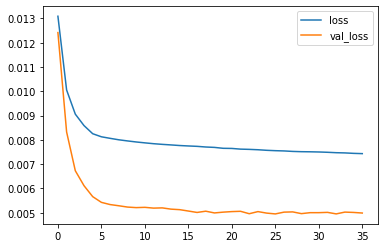

In [ ]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [ ]:
model.evaluate(x_test, y_test, verbose=0) # if eval x_train is better than x_test => overfit solution: less epochs, higher batch size, more data
model.evaluate(x_train, y_train, verbose=0) # if both low => underfit
test_predictions_ANN = model.predict(x_test)
test_predictions_ANN = pd.Series(test_predictions_ANN.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

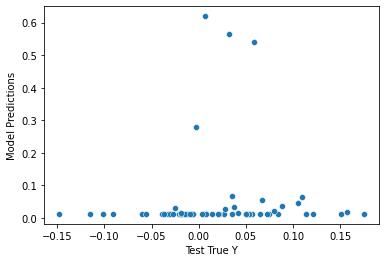

In [ ]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
#sns.scatterplot(x='Test True Y', y='Residuals', data = pred_df)

Plot residuals here

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [ ]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.079451434

In [ ]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.020527199

In [ ]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

0.1432731618647163

In [ ]:
explained_variance_score(y_test, test_predictions_ANN)

-3.7376794815063477

In [ ]:
# Mean squared error
MSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Mean absolute error
MAE_ANN = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Root mean squared error
RMSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

In [ ]:
SS_Residual_ANN = sum((y_test-test_predictions_ANN)**2)   
SS_Total_ANN = sum((y_test)**2)     

# r_squared
r_squared_ANN = 1 - (SS_Residual_ANN/SS_Total_ANN)
print("R2 =", r_squared_ANN) # Disregard R2 just report MSE,MAE Mariano diebold

print(r_squared_ANN)
print(MSE_ANN)
print(MAE_ANN)
print(RMSE_ANN)

R2 = -3.4467896989341664
-3.4467896989341664
0.020527199
0.079451434
0.1432731618647163


In [ ]:
print("R2_FF3 =", r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

R2_FF3 = 0.10694074491030225
MSE = 0.004122526394593386
MAE = 0.04944530342864499
Root MSE = 0.06420690301356534


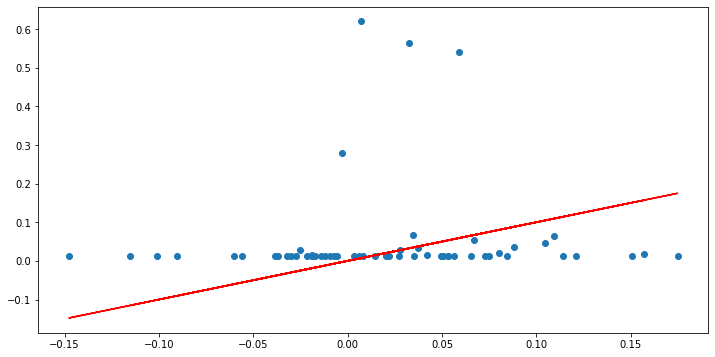

In [ ]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

# Second option: smaller hidden layer



In [ ]:
model_2 = Sequential()

model_2.add(Dense(6,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [ ]:
model_2.fit(x_train, y_train, batch_size=20, epochs=400,validation_split=0.2,callbacks=[early_stop], verbose=0)

Epoch 12: early stopping


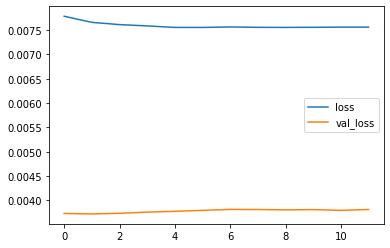

In [ ]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [ ]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN2 = model_2.predict(x_test)
test_predictions_ANN2 = pd.Series(test_predictions_ANN2.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN2],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
SS_Residual_ANN_2 = sum((y_test-test_predictions_ANN2)**2)   
SS_Total_ANN_2 = sum((y_test)**2)     

# r_squared
r_squared_ANN_2 = 1 - (SS_Residual_ANN_2/SS_Total_ANN_2)
print(r_squared_ANN_2)

0.09648631818737563


In [ ]:
MAE_ANN2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.004170786
0.050888542
0.06458162373092513


In [ ]:
print("R2_FF3 =", r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

R2_FF3 = 0.10694074491030225
MSE = 0.004122526394593386
MAE = 0.04944530342864499
Root MSE = 0.06420690301356534


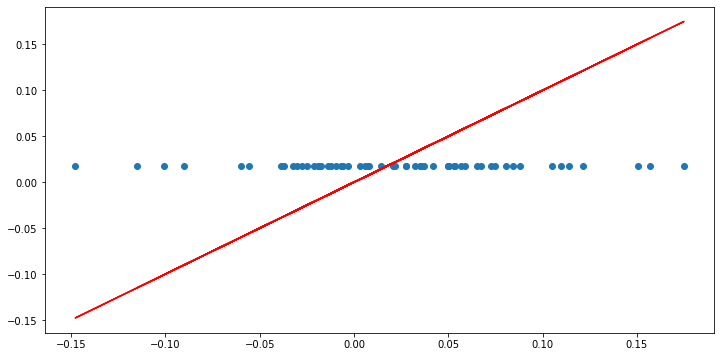

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN2)
plt.plot(y_test,y_test,'red')

**Option 3:** **Dropout**

In [ ]:
#@title
model_3 = Sequential()

model_3.add(Dense(6,activation='relu')) 
model_3.add(Dropout(0.25)) 

model_3.add(Dense(3,activation='relu'))

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [ ]:
model_3.fit(x_train, y_train, batch_size=20, epochs=400,validation_split=0.2,callbacks=[early_stop], verbose=0)

Epoch 34: early stopping


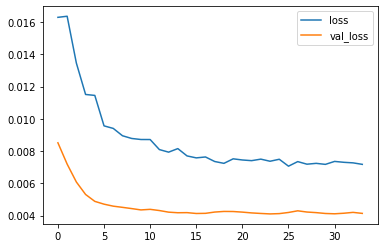

In [ ]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [ ]:
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN3 = model_3.predict(x_test)
test_predictions_ANN3 = pd.Series(test_predictions_ANN3.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN3],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
SS_Residual_ANN_3 = sum((y_test-test_predictions_ANN3)**2)   
SS_Total_ANN_3 = sum((y_test)**2)  
r_squared_ANN_3 = 1- (SS_Residual_ANN_3/SS_Total_ANN_3)
print(r_squared_ANN_3)

-0.5288685946398173


In [ ]:
MAE_ANN3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(r_squared_ANN_3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-0.5288685946398173
0.007057539
0.0630706
0.08400916133001049


In [ ]:
print("R2_FF3 =", r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

R2_FF3 = 0.10694074491030225
MSE = 0.004122526394593386
MAE = 0.04944530342864499
Root MSE = 0.06420690301356534


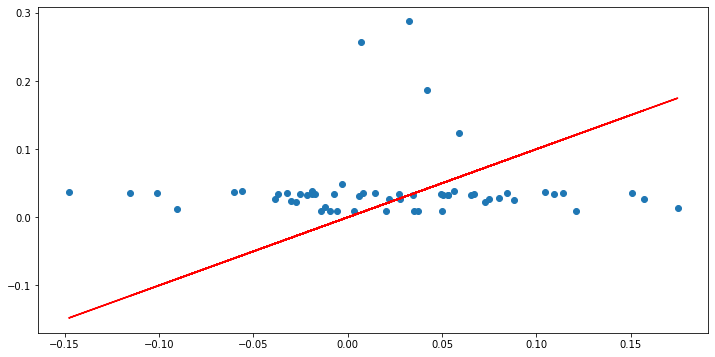

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN3)
plt.plot(y_test,y_test,'red')

# Diebold Mariano Function. Reference in the comments

In [ ]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

# Diebold Mariano code and results

In [ ]:
# Replaced with our values
# Comparison between FF3, ANN1
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.8375400704655163, p_value=0.07134436138879031)


In [ ]:
# Replaced with our values
# Comparison between FF3, ANN2
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN2
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-0.20536980761576049, p_value=0.838014888171194)


In [ ]:
# Replaced with our values
# Comparison between FF3, ANN3
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN3
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.8087156039370502, p_value=0.07577054834037213)


In [ ]:
print(r_squared_ANN)
print(r_squared_ANN_2)
print(r_squared_ANN_3)
print(r_squared_FF3)

-3.4467896989341664
0.09648631818737563
-0.5288685946398173
0.10694074491030225


In [ ]:
print(MSE_ANN)
print(MSE_ANN2)
print(MSE_ANN3)
print(MSE_reg)

0.020527199
0.004170786
0.007057539
0.004122526394593386
